# Reconstruction from Laser scanner

## Importing the point cloud

Let's consider the point cloud, corresponding to the co-registration of several scans, that you can download [here][rangscan] (unzip it before using it). It contains several trees and environmental objects such as soil, wires and stakes.
To have a first feeling of the scan, you can open it with [MeshLab][meshlab]
You can open the file with menu `File>Import Mesh`.
A window will asked you to select parameters of import of the file. For this particular file, you should choose: `Point Format` with `X Y Z R G B` and `Separator` with `SPACE`.

![Opening point cloud with MeshLab][meshlab-opening]

To have better rendering of the point cloud, you can play with display parameters on the right panel. In particular, for `Shading` use `None`. You can also control the `PointSize`.

[rangscan]: ./Rang03_Ligne41_60-pruned-colored.txt.zip
[meshlab]: http://www.meshlab.net/#download
[meshlab-opening]: ./meshlab-opening.png


## Cleaning the point cloud with MeshLab

You can now start cleaning the point cloud. For this you can use vertex selection and vertex removal tools.

![Cleaning with MeshLab][meshlab-cleaning]

You need then to export the cleaned point cloud in a file using menu `File>Export Mesh As`. Use `XYZ` format. Do not export normal with the point cloud.

[meshlab-selectvertices]: ./meshlab-selectvertices.png
[meshlab-deletevertices]: ./meshlab-deletevertices.png
[meshlab-cleaning]: ./meshlab-cleaning.png

## Importing and preprocessing the point cloud in PlantScan3D

We will now use [PlantScan3D][PlantScan3D] to process the point cloud in order to reconstruct the achitecture of the tree. To start from a clean pointcloud, you can use the [following one][wintertree] (decompress before using it).

To install PlantScan3D (skip these steps if it was already done), you need first to install [Conda][Conda] and then type in a shell:

```bash
source activate openalea
conda install plantscan3d -c openalea
```

To launch the editor, you can then type:

```bash
source activate openalea
plantscan3d
```

To import the scan, use the menu `File>Import Points`.

![Importing points in PlantScan3D][plantscan3d-opening]

To clean outliers, you can now filter points according to their density. To compute density, the k closest neighbor points are computer for each points of the scan. Point density is then estimated as the ratio between $k$ the number of neigbors (fixed in this case) and $R$, the maximum distance between each point and its neighbors.

$d = k/R^2$

To compute density, we will use menu `Points>Density>K-Density` and use default $k$ value of 16. We can then display the histogram of the point densities with menu `Points>Density>Histogram`. Finaly, a filtering can be applied using menu `Points>Filtering>Min Density`. Using a ratio of 5% makes it possible to remove the points with 5% lowest densities. 

![Density filtering with PlantScan3D][plantscan3d-filtering]

You can use `Ctrl-Z` and `Ctrl-Y` to Undo and Redo your filtering and compare before and after filtering. When filtering seems good for you, you can save the resulting point cloud with menu `File>Export Points`.

[PlantScan3D]: https://github.com/fredboudon/plantscan3d
[wintertree]: ./wintertree.xyz.zip
[Conda]: https://conda.io/docs/user-guide/install/index.html
[plantscan3d-opening]: ./plantscan3d-opening.png
[plantscan3d-filtering]: ./plantscan3d-filtering.png


## Skeleton Reconstruction

We will now try to reconstruct the skeleton of the tree. 

We will first apply a contraction step to the point cloud to contract the points toward the center of the shape. For this you can use menu `Points>Contraction>Euclidian`. A contraction consists in determining first a neighborhood for each point, computing its barycenter and assign the barycenter coordinates to the points. As the parameter, the editor asks the radius of contraction (size of the neighborhood of each point). In this case, a value of `0.4` seems adequate. 

To reconstruct the skeleton, we will first position a root node. For this, you can use the menu `Reconstruction>Add Root>Bottom` which will add a node at the bottom of the point cloud. To launch an automatic reconstruction, you can use the menu `Reconstruction>Skeletization>Xu et al.`. It asks for the size of the internode of the skeleton. For this a ratio with the heigth of the point cloud is prompted. Using default value of 50 gives you the following results.

![Reconstruction with PlantScan3D][plantscan3d-reconstruction]


You can now edit the different nodes of the skeleton by moving or deleting them, reparenting them or inserting new ones. To access the different possibilities, right click on a node.

![Node actions][plantscan3D-nodeactions]

 - **Remove node** : Delete the selected node
 - **Remove subtree** : Delete the selected node and all its descendants in the architecture
 - **New child** : Create a new child node from the selected node
 - **Reparent** : Select a new parent node of link the selected node to it.
 - **Split Edge** : Create intermediate node between the selected node and its parent.
 - **Skeletization** : Restart the automatic reconstruction from the selected node.
 - **Set Branching Points** : Set the selected node as a lateral child of its parent. Such relation are indicated with red or yellow edges.
 - **Set Axial Points** : Set the selected node as an apical child of its parent. Such relation are indicated with white or black edges. If other apical child exits, they become lateral.
 - **Stick to points** : Move the selected node in the middle of the 10 closest points.
 - **Stick subtree** : Move the selected node and its descendants in the middle of their 10 closest points.
 - **Revolve Around** : The camera of the editor will now turn around this point.

[plantscan3d-reconstruction]: ./plantscan3d-reconstruction.png
[plantscan3D-nodeactions]: ./plantscan3d-nodeactions.png



## Visualization tools

A number of tools help you inspect and edit your result. In particular on the right of the editor, you can activate the `Clip` planes that makes it possible to not display front and back of the view of the scene. This may be interesting to see node in the center of the tree for instance. 

Moreover, to see which parts of the point set are well captured by the reconstruction, you can use the `PointFilter` toolbar at the bottom of the editor that will remove all the points at a given distance to the skeleton. As such only far points from the skeleton are displayed helping you to decide if it requires additionnal nodes.

The `View` menu helps you decide also which information you want to display. The pointset or the nodes can be made invisible using this menu.

## Radius Estimation

Once you have finalized the editing of the structure, you can estimate the radius of the structure at each node. For this, you need to reload the pointset before contraction. A first method consists in estimating for each point the max or mean distance of the closest points to the node (See `Reconstruction>Radius>Estimate as Max/Mean Point Dist.`). However, it is very sensitive to noise. Another method is to use the pipe model (See `Reconstruction>Radius>Pipe Model`). It requires an estimate of the radius of a first root node and of the leaves. From this a pipe exponent is determined and a value of radius for each node. Once the value of the radii are estimated, you can display a 3D representation of the tree with the menu `Reconstruction>3D Representation`.

![Estimation of radius][plantscan3d-radius]

[plantscan3d-radius]: ./plantscan3d-radius.png

## Exporting the resulting structure

By default, the resulting structure can be exported in the MTG format. For this use the menu `File>Save MTG As`. You can use `bmtg` file format which consists in a python `cPickle.dump` of the structure. A more textual format is the `mtg` format which follow standart MTG guidelines. The exported structure can be use with script for subsequent exploration and analysis.

In [2]:
from openalea.mtg import MTG
# We load the resulting structure
g = MTG('wintertree.mtg')

In [8]:
def length_to_axis_begin(g, n):
    nb = 1
    while g.edge_type(n) == '<':
        n = g.parent(n)
        nb += 1
    return nb

def axis_length_histogram(g):
    axislengths = []
    for node in g.vertices(scale=g.max_scale()):
        apical_child = [n for n in g.children(node) if g.edge_type(n) == '<']
        if len(apical_child) == 0 : # We look for end of branch nodes i.e. with no apical child
            axislengths.append(length_to_axis_begin(g, node))
    return axislengths

axislengths = axis_length_histogram(g)
print(axislengths)

[1, 20, 3, 1, 1, 31, 3, 2, 2, 24, 11, 4, 5, 39, 1, 1, 8, 1, 32, 18, 1, 1, 1, 19, 7, 3, 2, 5, 26, 1, 5, 1, 34, 2, 6, 11, 8, 5, 3, 48]


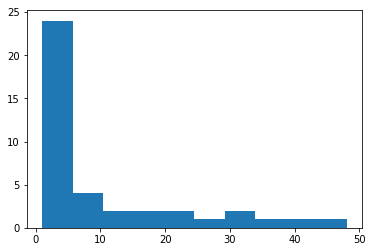

In [10]:
from matplotlib.pyplot import hist

histogram = hist(axislengths)